<a href="https://colab.research.google.com/github/VISHVAPRASATHVS/Deep-Learning-Neural-Network/blob/main/Fashion_MNIST_Image_Classification_using_CNNipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import Normalizer

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train , x_test = x_train / 255.0 , x_test / 255.0


In [37]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

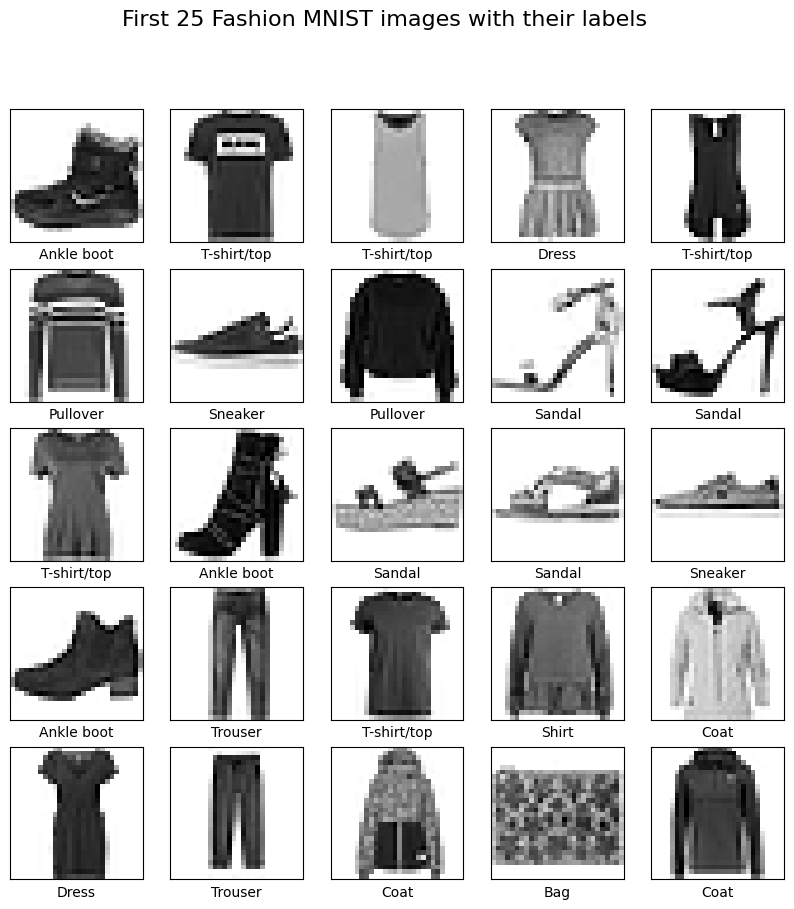

In [38]:
import matplotlib.pyplot as plt

# Define the class names for Fashion MNIST (optional, but good for context)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle('First 25 Fashion MNIST images with their labels', fontsize=16)
plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3 , 3) , activation = 'relu' , input_shape = (28 , 28 , 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(56, (3 , 3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(56, (3 , 3) , activation = 'relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 56)     │        14,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 56)       │        28,280 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,728 (166.91 KB)

 Trainable params: 42,728 (166.91 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation = 'relu'))
model.add(layers.Dense(10 , activation = 'softmax'))

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 56)     │        14,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 56)       │        28,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 504)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 56)             │        28,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,578 (279.60 KB)

 Trainable params: 71,578 (279.60 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [44]:
history = model.fit(x_train , y_train , epochs = 25 , validation_split = 0.1)

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7329 - loss: 0.7338 - val_accuracy: 0.8407 - val_loss: 0.4102
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8684 - loss: 0.3622 - val_accuracy: 0.8872 - val_loss: 0.3022
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8891 - loss: 0.3007 - val_accuracy: 0.8892 - val_loss: 0.3082
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9028 - loss: 0.2680 - val_accuracy: 0.9022 - val_loss: 0.2701
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9115 - loss: 0.2391 - val_accuracy: 0.8995 - val_loss: 0.2715
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9201 - loss: 0.2145 - val_accuracy: 0.9057 - val_loss: 0.2598
Epoch 7/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9232 - loss: 0.2032 - val_accuracy: 0.9080 - val_loss: 0.2605
Epoch 8/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9298 - loss: 0.1852

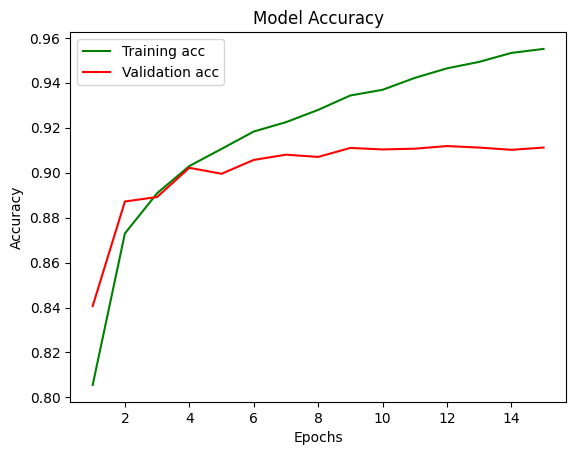

In [47]:
epochs = range(1,16)
acc = history.history['accuracy'][0:15]
val_acc = history.history['val_accuracy'][0:15]

plt.plot(epochs , acc , label = 'Training acc' , c = 'g')
plt.plot(epochs , val_acc , label = 'Validation acc' , c = 'r')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.grid(True)
plt.title('Model Accuracy')
plt.show()

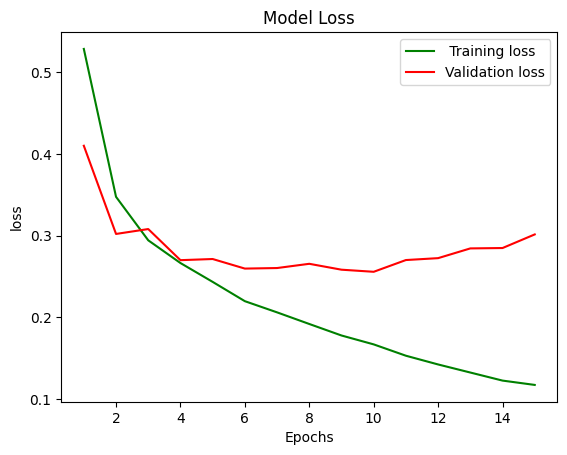

In [48]:
epochs = range(1,16)
loss = history.history['loss'][0:15]
val_loss = history.history['val_loss'][0:15]

plt.plot(epochs , loss , label = ' Training loss' , c = 'g')
plt.plot(epochs , val_loss , label = 'Validation loss' , c = 'r')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
#plt.grid(True)
plt.title('Model Loss')
plt.show()

In [49]:
y_pred = model.predict(x_test)
y_pred1 = np.argmax(y_pred , axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [52]:
accuracy_score(y_test , y_pred1)

0.8971

In [53]:
confusion_matrix(y_test , y_pred1)

array([[800,   1,  12,  16,   5,   1, 161,   0,   4,   0],
       [  3, 973,   1,  16,   4,   0,   2,   0,   1,   0],
       [ 34,   2, 821,   4,  54,   0,  83,   0,   1,   1],
       [ 17,   0,  11, 888,  43,   0,  39,   0,   2,   0],
       [  1,   1,  60,  22, 844,   0,  70,   0,   2,   0],
       [  0,   1,   0,   0,   0, 985,   0,  10,   0,   4],
       [ 83,   0,  38,  19,  65,   2, 788,   0,   5,   0],
       [  0,   0,   0,   0,   0,  22,   0, 962,   1,  15],
       [  8,   1,   5,   3,   9,   5,   6,   5, 957,   1],
       [  1,   0,   0,   1,   0,  15,   0,  30,   0, 953]])

In [56]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.82      0.84      1000
           3       0.92      0.89      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.96      0.98      0.97      1000
           6       0.69      0.79      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Bag


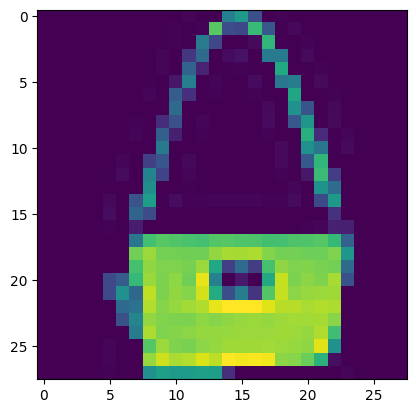

In [63]:
plt.imshow(x_test[31])
print(class_names[y_pred1[31]])